In [ ]:
import pandas as pd
import numpy as np

# tehran, sharif, amirkabir, ferdowsi, beheshti, khajenasir, elmosanat
# univs = np.array([3, 2.9, 2.8, 2.5, 2, 1.8, 1.5])
univs = {
    "tehran": 2,
    "sharif": 1.9,
    "amirkabir": 1.8,
    "ferdowsi": 1.7,
    "beheshti": 1.5,
    "khajenasir": 1.2,
    "elmosanat": 1.01,
}
# cs, ce, ph
# fields = np.array([3, 2.5, 2])
fields = {"computer science": 2, "computer engineering": 1.8, "physics": 1.7}
# daily, nightly, boors
# state = np.array([2, 1.9, 1])
state = {"daily": 1.9, "nightly": 1.25, "boors": 1.75}

res = []

for r, r_val in fields.items():
    for u, u_val in univs.items():
        for s, s_val in state.items():
            res.append([r, u, s, (r_val**u_val + s_val)])

df_rs = pd.DataFrame(res, columns=["field", "university", "state", "score"])

df_rs = df_rs.drop(
    df_rs[
        (df_rs["state"] == "boors")
        & (
            (df_rs["university"] != "amirkabir")
            | (df_rs["field"] != "computer science")
        )
    ].index,
)

df_rs.sort_values(by="score", ascending=False, inplace=True)

df_rs

,field,university,state,score
0,computer science,tehran,daily,5.900000
3,computer science,sharif,daily,5.632132
6,computer science,amirkabir,daily,5.382202
1,computer science,tehran,nightly,5.250000
8,computer science,amirkabir,boors,5.232202
9,computer science,ferdowsi,daily,5.149010
21,computer engineering,tehran,daily,5.140000
4,computer science,sharif,nightly,4.982132
24,computer engineering,sharif,daily,4.955046
42,physics,tehran,daily,4.790000


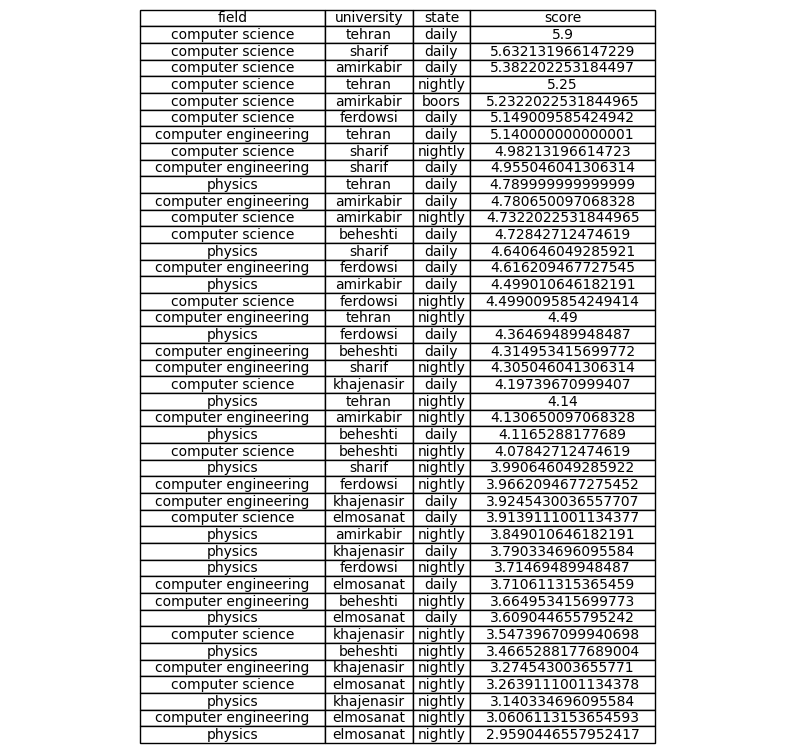

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
ax.axis("off")  # حذف محورهای نمودار

table = ax.table(
    cellText=df_rs.values, colLabels=df_rs.columns, cellLoc="center", loc="center"
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df_rs.columns))))

plt.show()